In [33]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [51]:
df = pd.read_csv('/content/2020년 노인실태조사_ver2.0(최종공개용).csv')
df.head()

,PID,HNO,AREA,EDM,ANS_TYPE,ANS_SUB1,ANS_SUB2,ANS_SUB3,S9_0,S9_2,...,RES_YY,RES_MM,RES_AGE,RES_MAR,RES_EDU1,RES_EDU2,RES_YN,RES_SUB,f_wgt1,s_wgt1
0,7501,1,35,2,0,99,999,1,0,99,...,1952,10,67,1,4,9,1,9,393.325736,0.512734
1,7601,1,35,2,0,99,999,1,0,99,...,1951,12,68,3,2,0,1,9,393.325736,0.512734
2,7802,2,23,1,0,99,999,1,1,1,...,1954,3,66,2,5,12,1,9,587.163656,0.765418
3,7801,1,23,1,0,99,999,1,0,99,...,1954,1,66,2,5,12,1,9,640.643430,0.835133
4,8001,1,35,1,0,99,999,1,0,99,...,1951,12,68,3,3,6,1,9,493.769927,0.643671


In [6]:
# df1 = df[['PID','HNO','AREA','EDM','ANS_TYPE','HTYPE','D2','D3','D5','D6_1',
#           'D7','D8','D9','E1','E3','E4','E5','F18'    
#          ]]
# df1.columns=['개인ID','응답자가구원번호','지역','동부/읍면부','응답자응답유형','노인가구형태','1년간여행여부',
#                  '1년간여가/문화활동','1년간교육학습','친목단체참여여부','자원봉사경험유무','종교종류','가장중요한활동',
#                  '현재경제활동여부','향후근로희망여부','노인일자리참여여부','노인일자리참여의향','노후생활비마련방법']
         

,PID,HNO,AREA,EDM,ANS_TYPE,HTYPE,D2,D3,D5,D6_1,D7,D8,D9,E1,E3,E4,E5,F18
0,7501,1,35,2,0,1,2,1,1,2,2,1,7,1,2,1,1,5
1,7601,1,35,2,0,1,1,1,1,2,2,2,4,1,2,1,1,1
2,7802,2,23,1,0,3,1,1,2,2,2,3,7,1,3,4,1,5
3,7801,1,23,1,0,3,1,1,2,2,2,2,7,1,2,4,2,5
4,8001,1,35,1,0,1,1,1,2,2,2,3,3,1,3,1,1,1


In [11]:
df1.columns=['개인ID','응답자가구원번호','지역','동부/읍면부','응답자응답유형','노인가구형태','1년간여행여부',
                 '1년간여가/문화활동','1년간교육학습','친목단체참여여부','자원봉사경험유무','종교종류','가장중요한활동',
                 '현재경제활동여부','향후근로희망여부','노인일자리참여여부','노인일자리참여의향','노후생활비마련방법']

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [115]:
#군집화 - k-means
df_noin = df[['D2','D3','D5','D6_1',
          'D7','D8','D9','E1','E3','E4','E5','E5_1'
         ]]
df_noin.columns=['1년간여행여부',
                 '1년간여가/문화활동','1년간교육학습','친목단체참여여부','자원봉사경험유무','종교종류','가장중요한활동',
                 '현재경제활동여부','향후근로희망여부','노인일자리참여여부','노인일자리참여의향','향후참여하고싶은유형']

In [116]:
s = df_noin[df_noin['노인일자리참여의향']==2].index
df_noin.drop(s,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [117]:
s = df_noin[df_noin['노인일자리참여의향']==9].index
df_noin.drop(s,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [129]:
# df_noin.to_csv('노인실태조사.csv')

In [118]:
df_noin.노인일자리참여의향.value_counts()

1    2093
Name: 노인일자리참여의향, dtype: int64

In [119]:
df_noin_std = StandardScaler().fit_transform(df_noin.iloc[:,:-1])

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(df_noin_std)

In [120]:
kmeans = KMeans(n_clusters=5, random_state=2022)
kmeans.fit(df_noin_std)

KMeans(n_clusters=5, random_state=2022)

In [121]:
df1 = pd.DataFrame({
    'PC1':iris_pca[:,0], 'PC2':iris_pca[:,1],
    'target':df_noin.iloc[:,-1], 'cluster':kmeans.labels_
})
df1.head(55).tail(5)

,PC1,PC2,target,cluster
190,1.416704,-0.399024,1,2
194,1.114274,-0.700833,1,2
198,-0.857218,1.159117,1,1
199,0.443460,-0.126569,1,0
201,-0.341991,0.543608,1,1


In [122]:
# 데이터 분포
df1.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
1      0        403
       1        380
       2        233
       3        219
       4         59
2      0         72
       1         51
       2         46
       3         25
       4          5
3      0         87
       1         69
       2         68
       3         40
       4          4
4      0         44
       1         31
       2         25
       3         10
       4         13
5      0         66
       1         52
       2         54
       3         30
       4          7

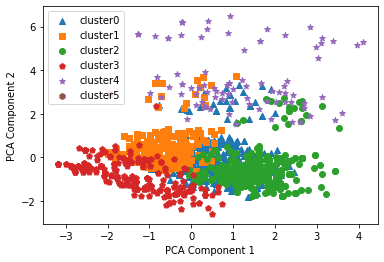

In [123]:
markers = ['^','s','o','p','*','h']

for i, marker in enumerate(markers):
    x_data = df1[df1.cluster == i]['PC1']
    y_data = df1[df1.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))

plt.legend()
plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()

In [124]:
# 실루엣분석
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(df_noin_std, kmeans.labels_)
df1['실루엣 계수'] = sil_samples
df1.head()

,PC1,PC2,target,cluster,실루엣 계수
0,-1.391306,0.001786,1,1,0.217589
1,-0.213793,0.852546,1,1,0.140653
2,0.854981,0.680729,1,0,0.005827
4,0.473727,1.193439,3,1,0.166691
5,1.620576,0.406031,1,2,0.104404


In [125]:
silhouette_score(df_noin_std, kmeans.labels_)

0.19887341308542827

In [126]:
df1['실루엣 계수'].mean()

0.1988734130854284

In [127]:
df1.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.090033
1    0.285070
2    0.232006
3    0.212427
4    0.248674
Name: 실루엣 계수, dtype: float64

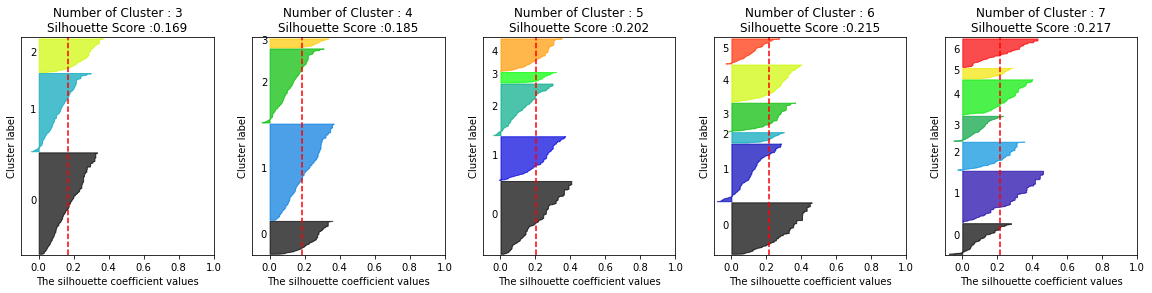

In [128]:
from visualize import visualize_silhouette
visualize_silhouette([3,4,5,6,7], df_noin_std)